# Multi-modal vectors

These vectors are from the Azure AI Vision multi-modal embedding model that can represent either text or images in a 1024-dimensional space.


In [1]:
import json

with open('embeddings/images_ai-vision.json') as f:
    image_vectors = json.load(f)

with open('embeddings/words_ai-vision.json') as f:
    word_vectors = json.load(f)

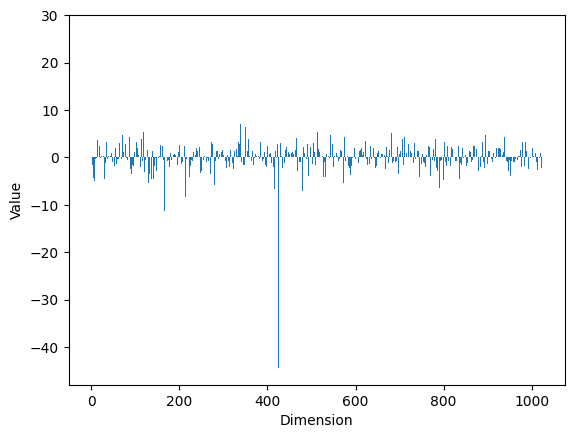

In [2]:
import random

import matplotlib.pyplot as plt

random_image_name = random.choice(list(image_vectors.keys()))
vector = image_vectors[random_image_name]

plt.bar(range(len(vector)), vector)
plt.xlabel('Dimension')
plt.ylabel('Value')
plt.show()

## Most similar to a target image

In [ ]:
import pandas as pd

def cosine_similarity(v1, v2):
    """Compute the cosine similarity between two vectors"""
    dot_product = sum([a * b for a, b in zip(v1, v2)])
    magnitude = (sum([a**2 for a in v1]) * sum([a**2 for a in v2])) ** 0.5
    return dot_product / magnitude

def most_similar(target_vector: str, vectors: dict) -> list[list]:
    """Return the most similar images and similarities to the given images"""
    similarities = {w: cosine_similarity(target_vector, vector) for w, vector in vectors.items()}
    most_similar = sorted(similarities, key=similarities.get, reverse=True)
    return pd.DataFrame([(vector_key, similarities[vector_key]) for vector_key in most_similar], columns=['vector key', 'similarity'])


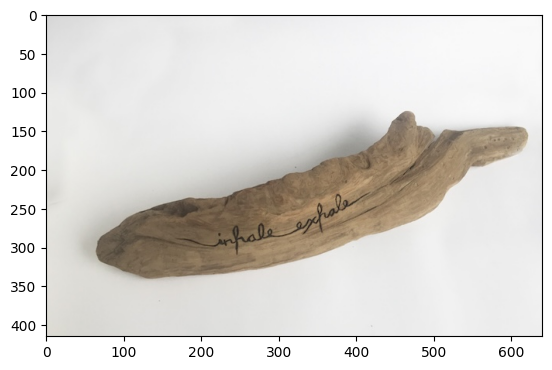

In [7]:
# Render the target image
target_image = "inhaleexhale_top.jpg"
plt.imshow(plt.imread(f"product_images/{target_image}"))

In [11]:
most_similar_df = most_similar(image_vectors[target_image], image_vectors)[0:10]
most_similar_df

vector key  similarity
0           inhaleexhale_top.jpg    1.000000
1              breathe_front.jpg    0.675889
2        incenseholder5_side.jpg    0.594426
3           glasscandle_side.jpg    0.576444
4        incenseholder4_side.jpg    0.573394
5  doubletealight1_aboveside.jpg    0.565687
6           glasscandle2_top.jpg    0.560658
7           hakunamatata_top.jpg    0.555541
8       singletealight1_side.jpg    0.553126
9       tripletealight_above.jpg    0.548659

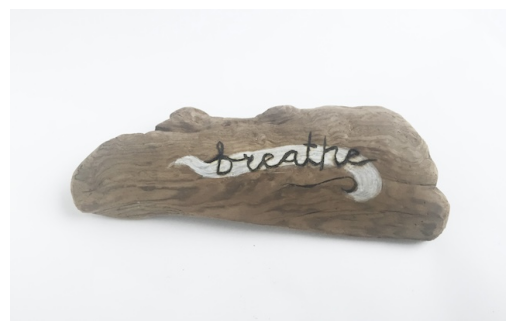

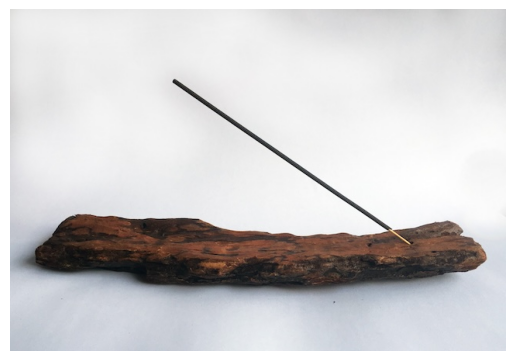

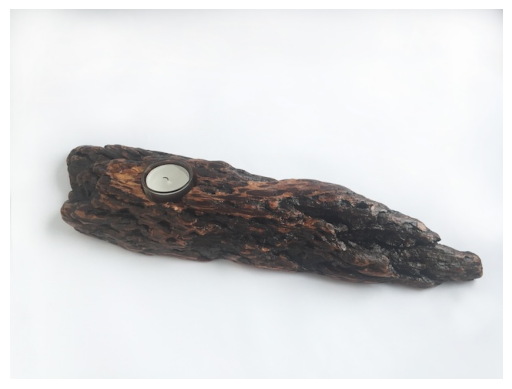

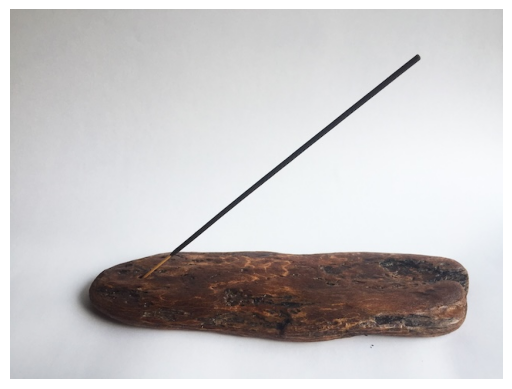

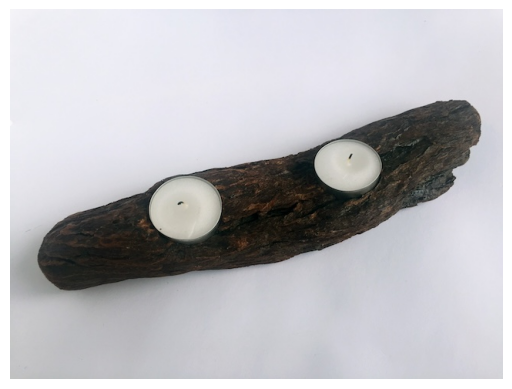

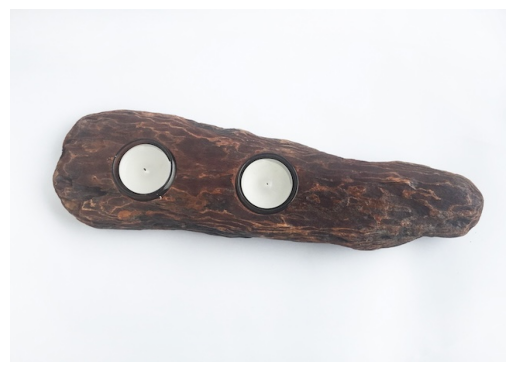

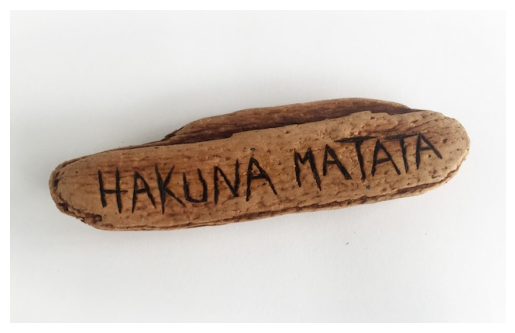

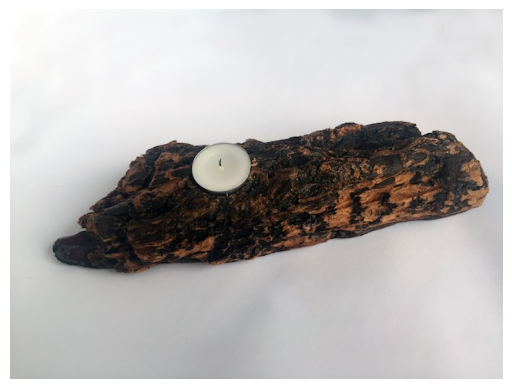

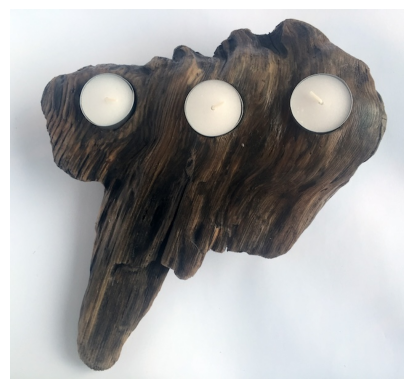

In [13]:
# Now render each of those images
for image_name in most_similar_df['vector key'][1:]:
    plt.imshow(plt.imread(f'product_images/{image_name}'))
    plt.axis('off')
    plt.show()

## Most similar to a target string

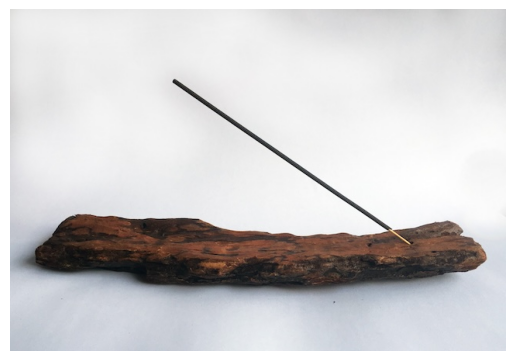

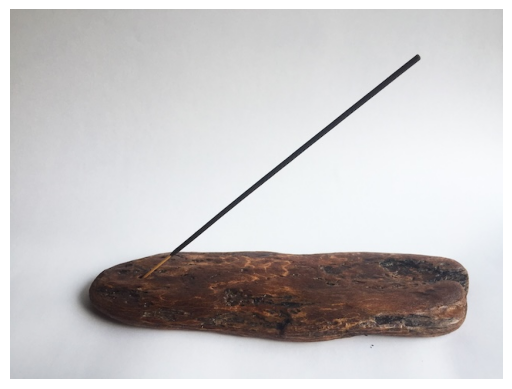

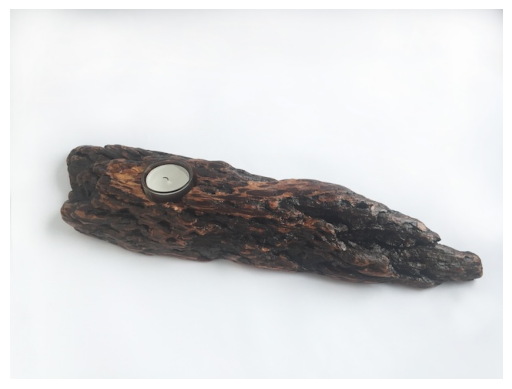

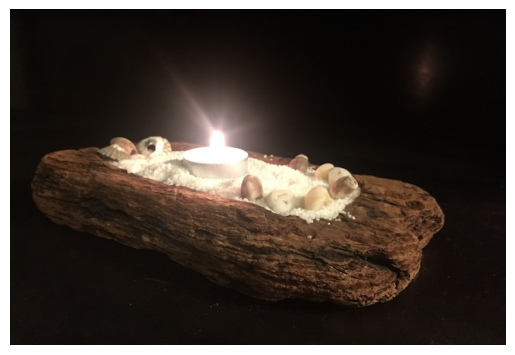

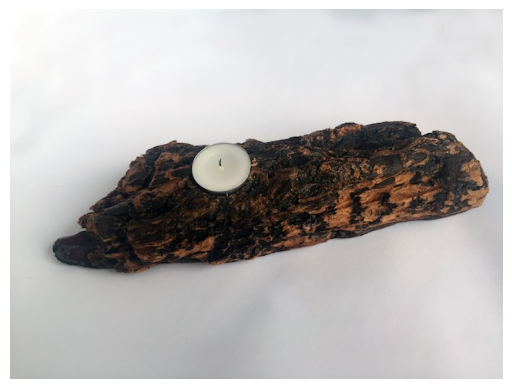

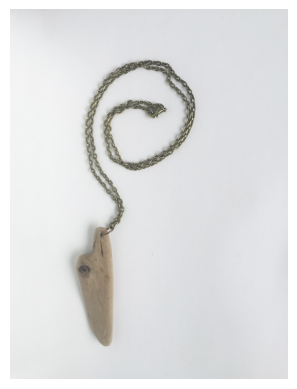

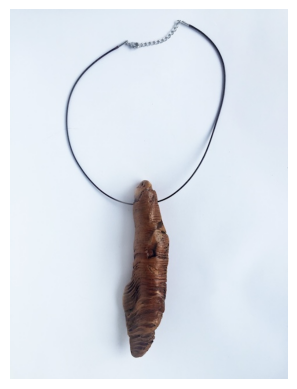

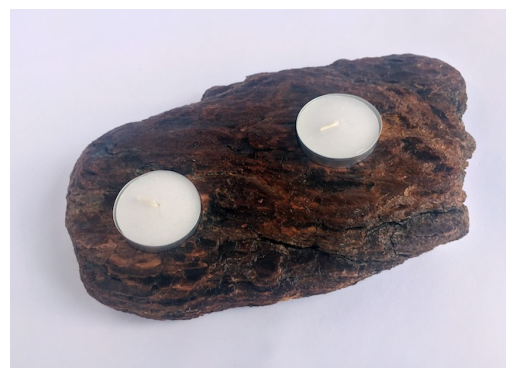

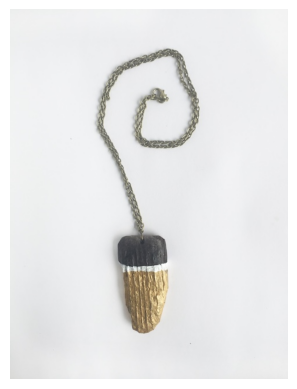

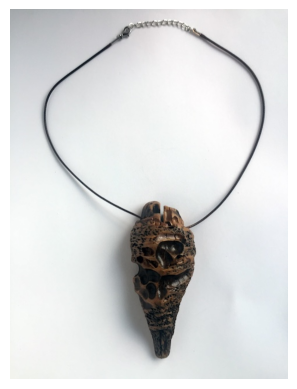

In [17]:
target_word = "time"
most_similar_df = most_similar(word_vectors[target_word], image_vectors)

for image_name in most_similar_df['vector key'][0:10]:
    plt.imshow(plt.imread(f'product_images/{image_name}'))
    plt.axis('off')
    plt.show()

## Search with query vectors

In [ ]:
import os

import dotenv
import requests
from azure.identity import DefaultAzureCredential, get_bearer_token_provider

dotenv.load_dotenv()

azure_credential = DefaultAzureCredential()
token_provider = get_bearer_token_provider(azure_credential, "https://cognitiveservices.azure.com/.default")
AZURE_AIVISION_SERVICE = os.getenv("AZURE_AIVISION_SERVICE")
AZURE_AIVISION_URL = f"https://{AZURE_AIVISION_SERVICE}.cognitiveservices.azure.com/computervision/retrieval"

def get_model_params():
    return {"api-version": "2023-02-01-preview", "modelVersion": "latest"}

def get_auth_headers():
    return {"Authorization": "Bearer " + token_provider()}

def get_text_embedding(text):
    url = f"{AZURE_AIVISION_URL}:vectorizeText"
    return requests.post(url, headers=get_auth_headers(), params=get_model_params(),
                         json={"text": text}).json()["vector"]

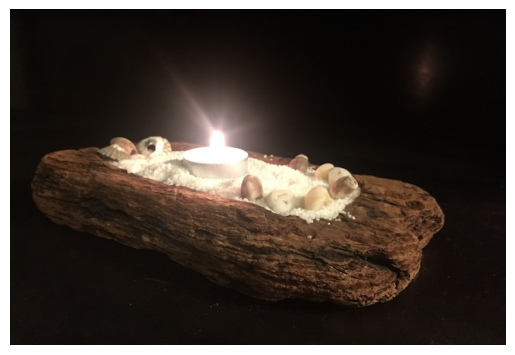

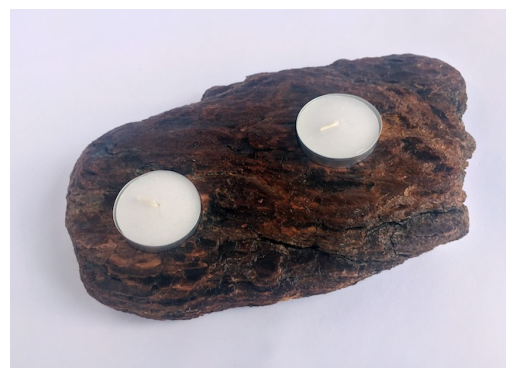

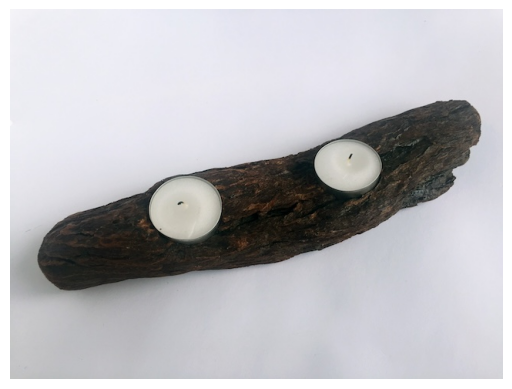

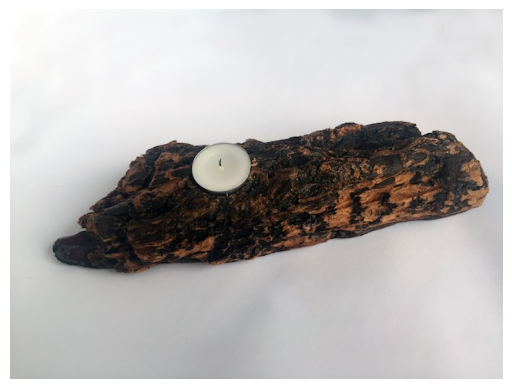

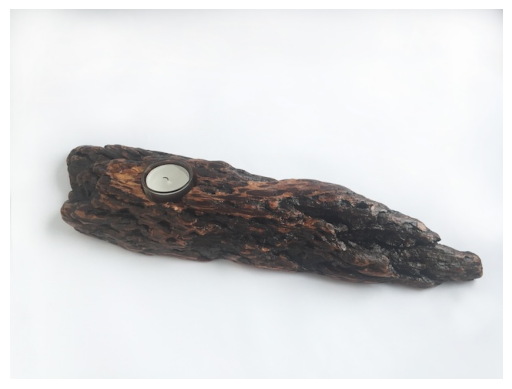

In [ ]:
embedding = get_text_embedding("a beachy candle")
most_similar_df = most_similar(embedding, image_vectors)

for image_name in most_similar_df['vector key'][0:5]:
    plt.imshow(plt.imread(f'product_images/{image_name}'))
    plt.axis('off')
    plt.show()

## Resources

* [Portlandia - She's making jewelry now](https://www.youtube.com/watch?v=Kg6H0Cd1_Jc)